In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from modules import *
from sim import *
from read_ramses import *


In [83]:
# choose simulation
sim_round = 8
sim_name = "tempfixedcut"
sim_dir = move_to_sim_dir(sim_round, sim_name)
sim_latex = sim_name_to_latex[sim_name]
print()

dump = get_dump(a_exp=0.1)
info = get_info(dump)

print("Dump: %d" % dump)
print("a_exp: %.3g" % info.a_exp)
print("Maximum AMR level: %d" % info.amr_level_max)


Moving to directory '/home/za9132/scratch/romain/round8/tempfixedcut'.

Dump: 19
a_exp: 0.07
Maximum AMR level: 13


In [84]:
starbirth_cat = SimpleNamespace(**np.load("starbirth.npz"))
stardeath_cat = SimpleNamespace(**np.load("stardeath.npz"))


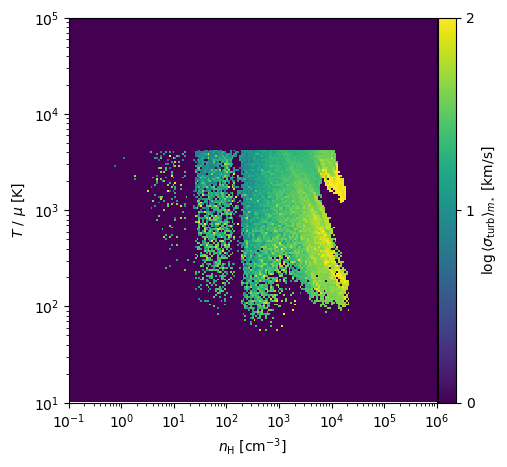

In [66]:
nbins = 200
n_H_extrema = (1e-1, 1e6)
temp_extrema = (1e1, 1e5)
vel_turb_extrema = (1e0 * const.km, 1e2 * const.km)

fig = plt.figure(figsize=(5, 5))

n_H = const.X_cosmo * starbirth_cat.density / const.m_H
temp = starbirth_cat.temperature
vel_turb = np.sqrt(2/3 * starbirth_cat.energy_turb)

n_H_2d, temperature_2d, vel_turb_sum_2d = calc_phase(n_H, temp, n_H_extrema, temp_extrema, nbins=nbins, weight=(vel_turb * starbirth_cat.mass / const.M_sol))
_, _, mass_2d = calc_phase(n_H, temp, n_H_extrema, temp_extrema, nbins=nbins, weight=(starbirth_cat.mass / const.M_sol))
vel_turb_avg_2d = vel_turb_sum_2d / (mass_2d + epsilon)

im = plt.pcolormesh(n_H_2d, temperature_2d, np.log10(vel_turb_avg_2d / const.km + epsilon), vmin=np.log10(vel_turb_extrema[0] / const.km), vmax=np.log10(vel_turb_extrema[1] / const.km))

plt.xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
plt.ylabel(r"$T~/~\mu$ [K]")
plt.xscale('log')
plt.yscale('log')
plt.xlim(*n_H_extrema)
plt.ylim(*temp_extrema)

cbar_ticks = np.arange(np.log10(vel_turb_extrema[0] / const.km), np.log10(vel_turb_extrema[1] / const.km)+1)
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="5%", pad=0.01)
plt.colorbar(im, cax=cax, ticks=cbar_ticks, label=r"$\log \langle \sigma_{\rm turb} \rangle_{m_*}~[{\rm km/s}]$")

# ax2.set_title(sim_latex)

# save_fig("sigmaturb-avg")


Saved figure as 'starbirth-temploc-121520231010.png'


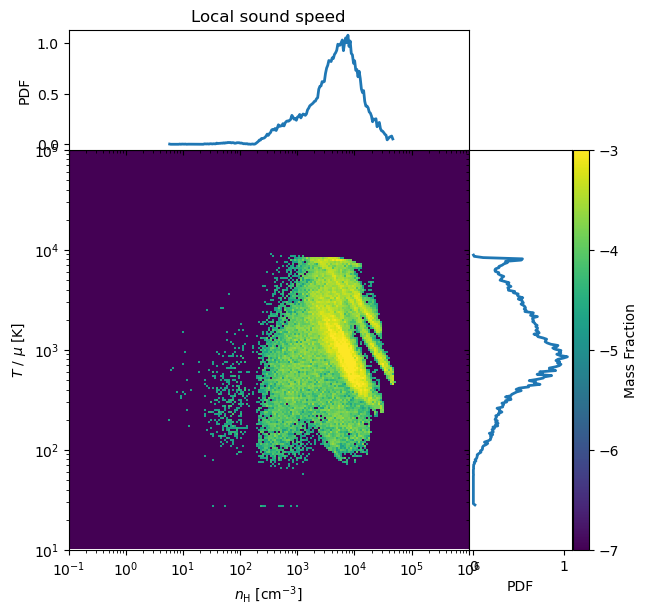

In [72]:
nbins = 200
n_H_extrema = (1e-1, 1e6)
temp_extrema = (1e1, 1e5)
mass_frac_extrema = (1e-7, 1e-3)

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H = const.X_cosmo * starbirth_cat.density / const.m_H
temp = starbirth_cat.temperature

n_H_2d, temperature_2d, mass_2d = calc_phase(n_H, temp, n_H_extrema, temp_extrema, nbins=nbins, weight=(starbirth_cat.mass / const.M_sol))
mass_frac_2d = mass_2d / (np.sum(starbirth_cat.mass) / const.M_sol)
im = ax1.pcolormesh(n_H_2d, temperature_2d, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H}$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$T~/~\mu$ [K]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(*n_H_extrema)
ax1.set_ylim(*temp_extrema)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)

hist, bins = np.histogram(np.log10(n_H), weights=(starbirth_cat.mass / const.M_sol), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(mass_1d) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)

ax2.set_ylabel("PDF")

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(temp), weights=(starbirth_cat.mass / const.M_sol), bins=nbins)
temp_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / np.sum(mass_1d) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, temp_1d, lw=2)

ax3.set_xlabel("PDF")

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

ax2.set_title(sim_latex)

save_fig("starbirth-temploc")


Text(0.5, 1.0, 'Variable $b_{\\rm turb}$')

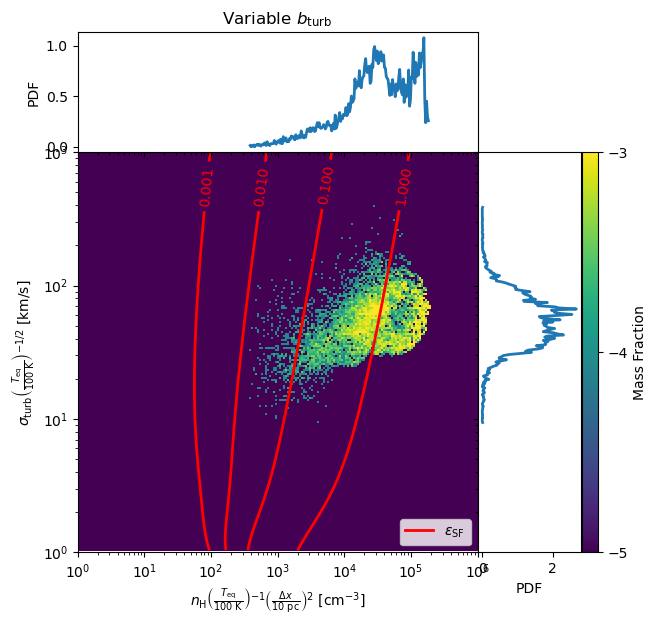

In [14]:
nbins = 200
n_H_extrema = (1e0, 1e6)
vel_turb_extrema = (1e0 * const.km, 1e3 * const.km)
mass_frac_extrema = (1e-5, 1e-3)
b_turb = 1.0

temp_fixed = 50
temp_loc = starbirth_cat.temperature
temp_eq = temp_fixed

dx_min = info.length_unit / 2**(info.amr_level_max + info.amr_level_coarse)
dx_loc = info.length_unit / 2**(starbirth_cat.level)
dx = dx_loc

fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_axes([0, 0, 1, 1])

n_H = const.X_cosmo * starbirth_cat.density / const.m_H * (100 / temp_eq) * (dx / (10 * const.pc))**2
vel_turb = np.sqrt(2/3 * starbirth_cat.energy_turb) * np.sqrt(100 / temp_eq)

n_H_2d, vel_turb_2d, mass_2d = calc_phase(n_H, vel_turb, n_H_extrema, vel_turb_extrema, nbins=nbins, weight=(starbirth_cat.mass / const.M_sol))
mass_frac_2d = mass_2d / (np.sum(starbirth_cat.mass) / const.M_sol)
im = ax1.pcolormesh(n_H_2d, vel_turb_2d / const.km, np.log10(mass_frac_2d + epsilon), vmin=np.log10(mass_frac_extrema[0]), vmax=np.log10(mass_frac_extrema[1]))

ax1.set_xlabel(r"$n_{\rm H} \left( \frac{T_{\rm eq}}{100~{\rm K}} \right)^{-1} \left( \frac{\Delta x}{10~{\rm pc}} \right)^2$ [${\rm cm^{-3}}$]")
ax1.set_ylabel(r"$\sigma_{\rm turb} \left( \frac{T_{\rm eq}}{100~{\rm K}} \right)^{-1/2}$ [${\rm km / s}$]")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(*n_H_extrema)
ax1.set_ylim(vel_turb_extrema[0] / const.km, vel_turb_extrema[1] / const.km)

ax2 = fig.add_axes([0, 1, 1, 0.3], sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)

hist, bins = np.histogram(np.log10(n_H), weights=(starbirth_cat.mass / const.M_sol), bins=nbins)
n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / (np.sum(starbirth_cat.mass) / const.M_sol) / np.diff(bins)[0]
ax2.plot(n_H_1d, mass_pdf_1d, lw=2)

ax2.set_ylabel("PDF")

ax3 = fig.add_axes([1, 0, 0.3, 1], sharey=ax1)
plt.setp(ax3.get_yticklabels(), visible=False);

hist, bins = np.histogram(np.log10(vel_turb), weights=(starbirth_cat.mass / const.M_sol), bins=nbins)
vel_turb_1d = 10**(bins[:-1] + np.diff(bins)[0])
mass_1d = hist
mass_pdf_1d = mass_1d / (np.sum(starbirth_cat.mass) / const.M_sol) / np.diff(bins)[0]
ax3.plot(mass_pdf_1d, vel_turb_1d / const.km, lw=2)

ax3.set_xlabel("PDF")

rho_2d = n_H_2d * const.m_p
epsilon_SF = calc_epsilon_SF(rho_2d[None, :], vel_turb_2d[:, None], b_turb=b_turb, dx=(10 * const.pc), temp_eq=100)
cs = ax1.contour(n_H_2d, vel_turb_2d / const.km, epsilon_SF, levels=[1e-3, 1e-2, 1e-1, 1e0], colors='red', linewidths=2)
ax1.clabel(cs, [1e-3, 1e-2, 1e-1, 1e0])

custom_lines = [Line2D([0], [0], color='red', lw=2)]
ax1.legend(custom_lines, [r'$\varepsilon_{\rm SF}$'], loc=4)

cbar_ticks = np.arange(np.log10(mass_frac_extrema[0]), np.log10(mass_frac_extrema[1])+1)
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="15%", pad=0.01)
plt.colorbar(im, ax=ax1, cax=cax, ticks=cbar_ticks, label=r"Mass Fraction")

ax2.set_title(sim_latex)

# save_fig("starbirth-SFE-tempfixedcut")


In [75]:
def quickpdf(var, extrema, nbins=200, do_log=True, label='misc var'):
    if do_log: var = np.log10(var + epsilon)
    if do_log: extrema = (np.log10(extrema[0]), np.log10(extrema[1]))
    hist, bins = np.histogram(var, weights=(starbirth_cat.mass / const.M_sol), bins=nbins, range=extrema)
    var_1d = bins[:-1] + np.diff(bins)[0]
    if do_log: var_1d = 10**var_1d
    mass_1d = hist
    mass_pdf_1d = mass_1d / (np.sum(starbirth_cat.mass) / const.M_sol) / np.diff(bins)[0]
    plt.plot(var_1d, mass_pdf_1d, lw=2)
    if do_log: plt.xscale('log')
    plt.xlabel(label)
    plt.ylabel('PDF')
    median_idx = np.argmin(np.abs(np.cumsum(mass_pdf_1d * np.diff(bins)) - 0.5))
    plt.axvline(x=var_1d[median_idx], color='red', lw=2, label=(label + '$= %.3g$' % var_1d[median_idx]))
    plt.legend(loc=2)
    plt.title(sim_latex)
    

Saved figure as 'bturbpdf-121520231006.png'


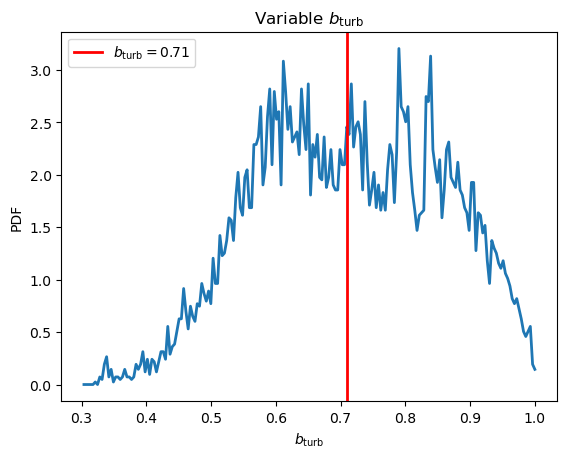

In [55]:
quickpdf(starbirth_cat.b_turb, (0.3, 1.0), do_log=False, label=r'$b_{\rm turb}$')

save_fig("bturbpdf")


Saved figure as 'epspdf_tempfixedcut-121520231013.png'


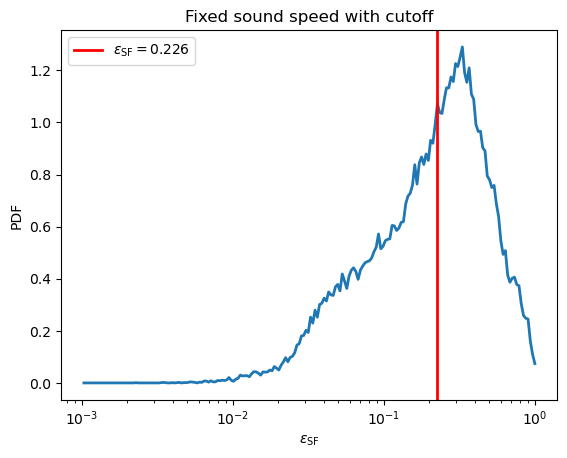

In [86]:
b_turb_fixed = 1.0
b_turb_loc = starbirth_cat.b_turb
b_turb = b_turb_fixed

temp_fixed = 50
temp_loc = starbirth_cat.temperature
temp_eq = temp_fixed

dx_min = info.length_unit / 2**(info.amr_level_max + info.amr_level_coarse)
dx_loc = info.length_unit / 2**(starbirth_cat.level)
dx = dx_loc

vel_turb = np.sqrt(2/3 * starbirth_cat.energy_turb)
epsilon_SF = calc_epsilon_SF(starbirth_cat.density, vel_turb, b_turb=b_turb, dx=dx, temp_eq=temp_eq)

quickpdf(epsilon_SF, (1e-3, 1e0), do_log=True, label=r'$\epsilon_{\rm SF}$')

save_fig("epspdf_tempfixedcut")


Text(0.5, 1.0, 'Variable $b_{\\rm turb}$')

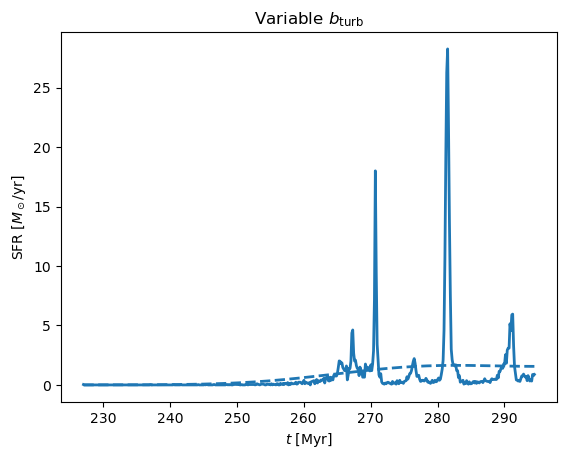

In [56]:
nbins = 500
filter_sigma = 10 * const.Myr

counts, bins = np.histogram(starbirth_cat.time, bins=nbins, weights=starbirth_cat.mass)

star_birthtime_1d = bins[:-1] + np.diff(bins)[0]
star_mass_1d = counts
SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

filter_sigma_idx = filter_sigma / np.diff(star_birthtime_1d)[0]
SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)

plt.plot(star_birthtime_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=2, alpha=1., label=sim_latex, color='C0')
plt.plot(star_birthtime_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, alpha=1., label=sim_latex, color='C0', linestyle='--')

plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
plt.xlabel(r"$t$ [Myr]")

plt.title(sim_latex)

# save_fig("SFR-dxmin")


Text(0.5, 1.0, 'Variable $b_{\\rm turb}$')

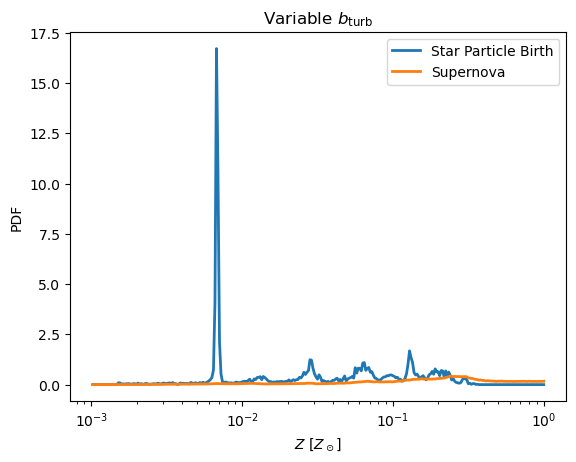

In [57]:
nbins = 300

for i, star_cat in enumerate([starbirth_cat, stardeath_cat]):

    hist, bins = np.histogram(np.log10(star_cat.metallicity / const.Z_sol), weights=(star_cat.mass / const.M_sol), bins=nbins, range=[-3, 0])
    metallicity_1d = 10**(bins[:-1] + np.diff(bins)[0])
    mass_1d = hist
    mass_pdf_1d = mass_1d / np.sum(star_cat.mass / const.M_sol) / np.diff(bins)[0]
    plt.plot(metallicity_1d, mass_pdf_1d, lw=2, label=["Star Particle Birth", "Supernova"][i])
    
plt.legend()
plt.xscale('log')
plt.xlabel(r'$Z$ [$Z_\odot$]')
plt.ylabel(r'PDF')
plt.title(sim_latex)

# save_fig("zpdf-zfunc")


Text(0.5, 1.0, 'Variable $b_{\\rm turb}$')

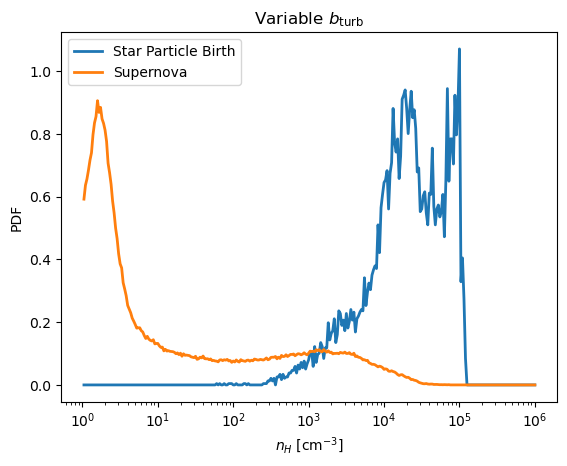

In [58]:
nbins = 300

for i, star_cat in enumerate([starbirth_cat, stardeath_cat]):

    n_H = const.X_cosmo * star_cat.density / const.m_H

    hist, bins = np.histogram(np.log10(n_H), weights=(star_cat.mass / const.M_sol), bins=nbins, range=[0, 6])
    n_H_1d = 10**(bins[:-1] + np.diff(bins)[0])
    mass_1d = hist
    mass_pdf_1d = mass_1d / np.sum(star_cat.mass / const.M_sol) / np.diff(bins)[0]
    plt.plot(n_H_1d, mass_pdf_1d, lw=2, label=["Star Particle Birth", "Supernova"][i])
    
plt.legend()
plt.xscale('log')
plt.xlabel(r'$n_H$ [${\rm cm^{-3}}$]')
plt.ylabel(r'PDF')
plt.title(sim_latex)

# save_fig("star-density-pdf", subdir=os.path.join("round%d" % sim_round, sim_name))


### simulation comparison


Moving to directory '/home/za9132/scratch/romain/round5/mff-dxmin'.
Moving to directory '/home/za9132/scratch/romain/round5/mff-dxloc'.


(0.0, 2.0)

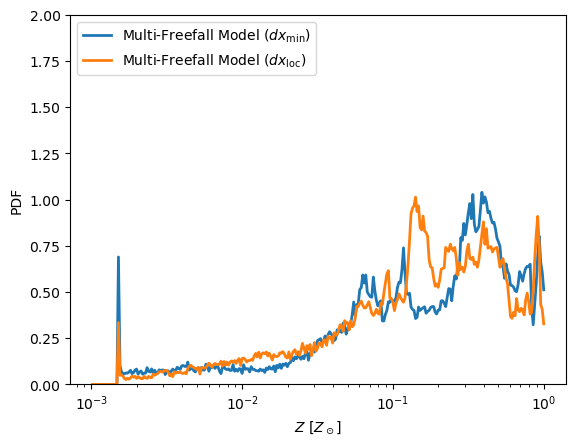

In [29]:
sim_round = 5

for i, sim_name in enumerate(["mff-dxmin", "mff-dxloc"]):

    sim_dir = move_to_sim_dir(sim_round, sim_name)
    sim_latex = sim_name_to_latex[sim_name]
    
    starbirth_cat = SimpleNamespace(**np.load("starbirth.npz"))
    stardeath_cat = SimpleNamespace(**np.load("stardeath.npz"))

    hist, bins = np.histogram(np.log10(starbirth_cat.metallicity / const.Z_sol), weights=(starbirth_cat.mass / const.M_sol), bins=nbins, range=[-3, 0])
    metallicity_1d = 10**(bins[:-1] + np.diff(bins)[0])
    mass_1d = hist
    mass_pdf_1d = mass_1d / np.sum(starbirth_cat.mass / const.M_sol) / np.diff(bins)[0]
    plt.plot(metallicity_1d, mass_pdf_1d, lw=2, label=sim_latex, color='C%d' % i)

    plt.xscale('log')
    plt.xlabel(r'$Z$ [$Z_\odot$]')
    plt.ylabel(r'PDF')
    plt.legend(loc=2)
    
plt.ylim(0, 2)
    
#save_fig("zpdf-comparison")


Moving to directory '/home/za9132/scratch/romain/round8/tempfixedcut'.
Moving to directory '/home/za9132/scratch/romain/round8/temploc'.
Saved figure as 'SFR-comparison-fixedloc-121520231018.png'


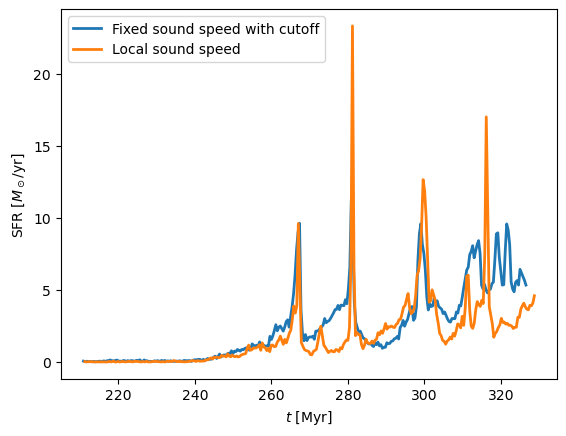

In [88]:
sim_round = 8

for i, sim_name in enumerate(["tempfixedcut", "temploc"]):

    sim_dir = move_to_sim_dir(sim_round, sim_name)
    sim_latex = sim_name_to_latex[sim_name]
    
    starbirth_cat = SimpleNamespace(**np.load("starbirth.npz"))
    stardeath_cat = SimpleNamespace(**np.load("stardeath.npz"))

    nbins = 300
    filter_sigma = 10 * const.Myr

    counts, bins = np.histogram(starbirth_cat.time, bins=nbins, weights=starbirth_cat.mass)

    star_birthtime_1d = bins[:-1] + np.diff(bins)[0]
    star_mass_1d = counts
    SFR_mass_1d = star_mass_1d / np.diff(bins)[0]

    filter_sigma_idx = filter_sigma / np.diff(star_birthtime_1d)[0]
    SFR_mass_1d_smoothed = gaussian_filter(SFR_mass_1d, sigma=filter_sigma_idx)

    plt.plot(star_birthtime_1d / const.Myr, SFR_mass_1d / const.M_sol * const.yr, lw=2, alpha=1., label=sim_latex, color='C%d' % i)
    #plt.plot(star_birthtime_1d / const.Myr, SFR_mass_1d_smoothed / const.M_sol * const.yr, lw=2, alpha=1., color='C%d' % i, linestyle='--')

    plt.ylabel(r"SFR [$M_\odot / {\rm yr}$]")
    plt.xlabel(r"$t$ [Myr]")
    plt.legend()
    
save_fig("SFR-comparison-fixedloc")
